# PART 1: 

## 1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

### Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

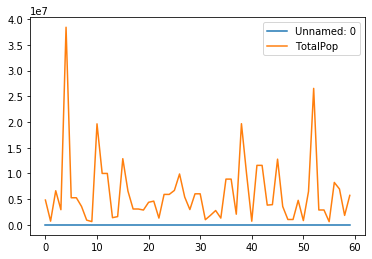

In [390]:

us_census = pd.concat([pd.read_csv('states'+str(i)+'.csv') for i in range(10)],ignore_index=True)
#display(us_census)
#display(us_census.head())
us_census.plot()

## 2. It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

## Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [391]:
us_census = pd.concat([pd.read_csv('states'+str(i)+'.csv') for i in range(10)],ignore_index=True)
display(us_census.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


## 3. Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [392]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


## 4. Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

## Start to make a plan for how to convert these columns into the right types for manipulation.
### Regex to the Rescue

In [393]:
us_census.head()
#us_census = us_census.applymap(lambda x: str(x).replace('%',''))
#us_census = us_census.convert_dtypes()
#us_census.dtypes


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


## 5. Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [394]:
#us_census = us_census.applymap(lambda x: str(x).replace('$',''))
us_census['Income'] = us_census['Income'].map(lambda x: x.strip('$'))
us_census['Income'] = pd.to_numeric(us_census['Income'])
us_census['Income'].dtypes


dtype('float64')

## 6. Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

### Split the column into those two new columns using str.split and separating out those results.

In [395]:
us_census[['Men','Women']] = us_census['GenderPop'].str.split(pat='_', n=-1, expand=True)
#us_census.drop(columns = 'GenderPop', inplace=True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135M,19334329F


## 7. Convert both of the columns into numerical datatypes.

### There is still an M or an F character in each entry! We should remove those before we convert.

In [396]:
#us_census['Men'] = us_census['Men'].map(lambda x: x.strip('M'))
#us_census['Women'] = us_census['Women'].map(lambda x: x.strip('F'))
us_census['Men'] = us_census["Men"].replace('M','', regex=True)
us_census['Women'] = us_census["Women"].replace('F','', regex=True)


us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])
print(us_census[['Men','Women']].dtypes)


us_census.head()

Men        int64
Women    float64
dtype: object


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0


## 8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

### Use matplotlib to make a scatterplot!

#### plt.scatter(the_women_column, the_income_column) 
#### Remember to call plt.show() to see the graph!

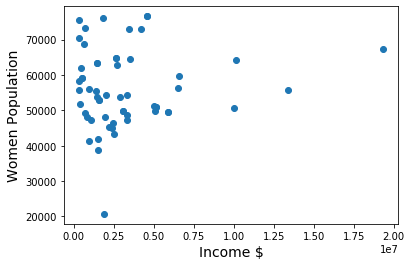

In [397]:

plt.scatter(us_census['Women'], us_census['Income'])
plt.xlabel('Income $', fontsize=14)
plt.ylabel('Women Population', fontsize=14)
plt.show()

## 9. Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

### We can fill in those nans by using pandas’ .fillna() function.

### You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

### Print out the Women column after filling the nan values to see if it worked!

In [398]:
us_census['Women'].fillna(us_census['TotalPop']-us_census['Men'] , inplace=True)
print(us_census[['State','Women']])


                   State       Women
0                Alabama   2489527.0
1                 Alaska    349215.0
2                Arizona   3342840.0
3               Arkansas   1506295.0
4             California  19334329.0
5               Colorado   2630239.0
6               Colorado   2630239.0
7            Connecticut   1841615.0
8               Delaware    478041.0
9   District of Columbia    340810.0
10               Florida  10045763.0
11               Georgia   5123362.0
12               Georgia   5123362.0
13                Hawaii    696428.0
14                 Idaho    806083.0
15              Illinois   6556862.0
16               Indiana   3333382.0
17                  Iowa   1558931.0
18                  Iowa   1558931.0
19                Kansas   1453125.0
20              Kentucky   2233145.0
21             Louisiana   2364097.0
22                 Maine    679019.0
23              Maryland   3057895.0
24              Maryland   3057895.0
25         Massachusetts   3455936.0
2

## 10. We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [399]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

## 11. Drop those duplicates using the .drop_duplicates() function.

In [400]:
us_census.drop_duplicates(inplace=True)

## 12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

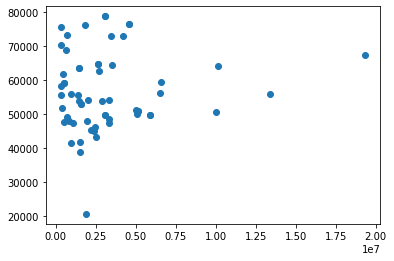

In [401]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.show()

# Histograms of Races

## 13. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


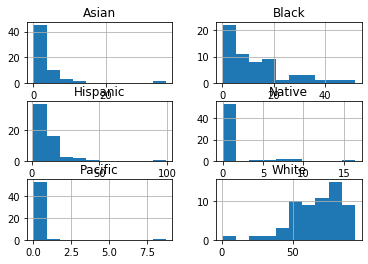

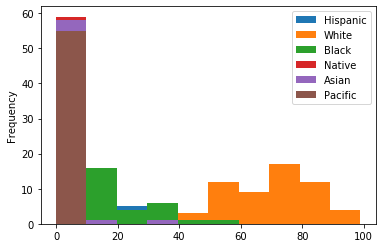

In [404]:
print(us_census.columns)
# us_census['Hispanic'] = us_census["Hispanic"].replace('%','', regex=True)
# #us_census['Hispanic'] = pd.to_numeric(us_census['Hispanic'])

# us_census['White'] = us_census["White"].replace('%','', regex=True)
# #us_census['White'] = pd.to_numeric(us_census['White'])

# us_census['Black'] = us_census["Black"].replace('%','', regex=True)
# #us_census['Black'] = pd.to_numeric(us_census['Black'])

# us_census['Native'] = us_census["Native"].replace('%','', regex=True)
# #us_census['Native'] = pd.to_numeric(us_census['Native'])

# us_census['Asian'] = us_census["Asian"].replace('%','', regex=True)
#us_census['Asian'] = pd.to_numeric(us_census['Asian'])

# us_census['Pacific'] = us_census["Pacific"].replace('%','', regex=True)
# #us_census['Pacific'] = pd.to_numeric(us_census['Pacific'])


us_census = us_census.replace('%','', regex=True)

# print(us_races.dtypes)

#.replace('%','', regex=True)
races_col=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']


## 14. Try to make a histogram for each one!

### You will have to get the columns into numerical format, and those percentage signs will have to go.

### Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

### Get Creative

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


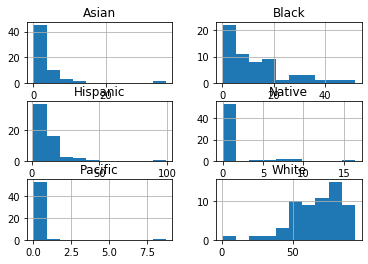

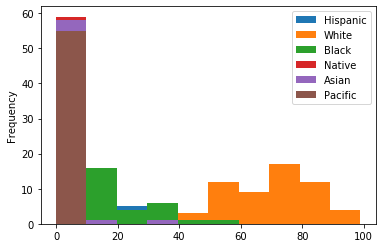

In [407]:
us_census[races_col] = us_census[races_col].apply(pd.to_numeric)
#us_census[races_col] = us_census[races_col].astype("float64")
print(us_census.dtypes)
us_census[races_col].hist()
us_census[races_col].plot.hist()

## 15. Phew. You’ve definitely impressed your boss on your first day of work.

### But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

### Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

# PART 2:

### LEARN DATA ANALYSIS WITH PANDAS
### Petal Power Inventory
### You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!


### Answer Customer Emails

## 1. Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.

In [255]:
Inventory= pd.read_csv("inventory.csv")
display(Inventory)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


## 2. Inspect the first 10 rows of inventory.

In [256]:
Inventory[:10]

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


## 3. The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [257]:
staten_island = Inventory[Inventory['location']=='Staten Island']
print(staten_island)

        location  product_type         product_description  quantity  price
0  Staten Island         seeds                       daisy         4   6.99
1  Staten Island         seeds                  calla lily        46  19.99
2  Staten Island         seeds                      tomato        85  13.99
3  Staten Island  garden tools                        rake         4  13.99
4  Staten Island  garden tools                 wheelbarrow         0  89.99
5  Staten Island  garden tools                       spade        93  19.99
6  Staten Island  pest_control               insect killer        74  12.99
7  Staten Island  pest_control                 weed killer         8  23.99
8  Staten Island       planter  20 inch terracotta planter         0  17.99
9  Staten Island       planter      8 inch plastic planter        53   3.99


## 4. A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [258]:
product_request = staten_island['product_description']
print(product_request)

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object


## 5.Another customer emails to ask what types of seeds are sold at the Brooklyn location.

### Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request



### Inventory

In [408]:
Inventory[(Inventory['location']=='Brooklyn') & (Inventory['product_type']=='seeds')]

,location,product_type,product_description,quantity,price,in_stock,total_value
10,Brooklyn,seeds,daisy,50,6.99,True,349.5
11,Brooklyn,seeds,calla lily,0,19.99,False,0.0
12,Brooklyn,seeds,tomato,0,13.99,False,0.0


## 6. Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

In [274]:
Inventory['in_stock']=Inventory['quantity' ]> 0
print(Inventory['in_stock'])

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27     True
28     True
Name: in_stock, dtype: bool


## 7.Petal Power wants to know how valuable their current inventory is.

### Create a column called total_value that is equal to price multiplied by quantity.

In [275]:
Inventory['total_value']=Inventory['price'] * Inventory['quantity']
print(Inventory[['price','quantity','total_value']])

    price  quantity  total_value
0    6.99         4        27.96
1   19.99        46       919.54
2   13.99        85      1189.15
3   13.99         4        55.96
4   89.99         0         0.00
5   19.99        93      1859.07
6   12.99        74       961.26
7   23.99         8       191.92
8   17.99         0         0.00
9    3.99        53       211.47
10   6.99        50       349.50
11  19.99         0         0.00
12  13.99         0         0.00
13  13.99        15       209.85
14  89.99        82      7379.18
15  19.99        36       719.64
16  12.99        80      1039.20
17  23.99        76      1823.24
18  17.99         5        89.95
19   3.99        26       103.74
20   6.99        57       398.43
21  19.99        95      1899.05
22  13.99        45       629.55
23  13.99        21       293.79
24  89.99        98      8819.02
25  19.99        26       519.74
26  12.99         0         0.00
27  23.99        16       383.84
28  17.99        87      1565.13


## 8.The Marketing department wants a complete description of each product for their catalog.

### The following lambda function combines product_type and product_description into a single string:

#### combine_lambda = lambda row: \
####     '{} - {}'.format(row.product_type,
####                      row.product_description)

### Paste this function into script.py.

In [279]:
import script


## 9. Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.

In [288]:
inventory["full_description"] = inventory.apply(script.combine_lambda, axis=1)
inventory

,location,product_type,product_description,quantity,price,full_description
0,Staten Island,seeds,daisy,4,6.99,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,planter - 8 inch plastic planter
